<a href="https://colab.research.google.com/github/Sweta-Das/ML-with-Python/blob/main/3_1_Unsupervised_Preprocessing_%26_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


The dataset contains 569 datapoints, each represented by 30 measurements. The dataset is split into 426 samples for training set and 143 samples for test set.

In [6]:
# Import the class for preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fitting the training data with scaler
scaler.fit(X_train)

MinMaxScaler()

In [7]:
# Transforming data
X_train_scaled = scaler.transform(X_train)

# Printing dataset properties before and after scaling
print("Transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

Transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
# Transforming test set before applying SVM model
X_test_scaled = scaler.transform(X_test)

print("per-feature minimum after scaling:\n {}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


We can see that after scaling, the min and max value of test set is not between 0 and 1. This is because the MinMaxScaler() (and also others) always apply the same transformation to the training and test set i.e., the transform() always subtracts training set min and divides by the training set range, which might be different from the min and range of the test set.</br>
Xsc = (X−Xmin)/(Xmax−Xmin)

### Applying min and range of test set

In [9]:
!pip install mglearn
import mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.0 MB/s eta 0:00:00


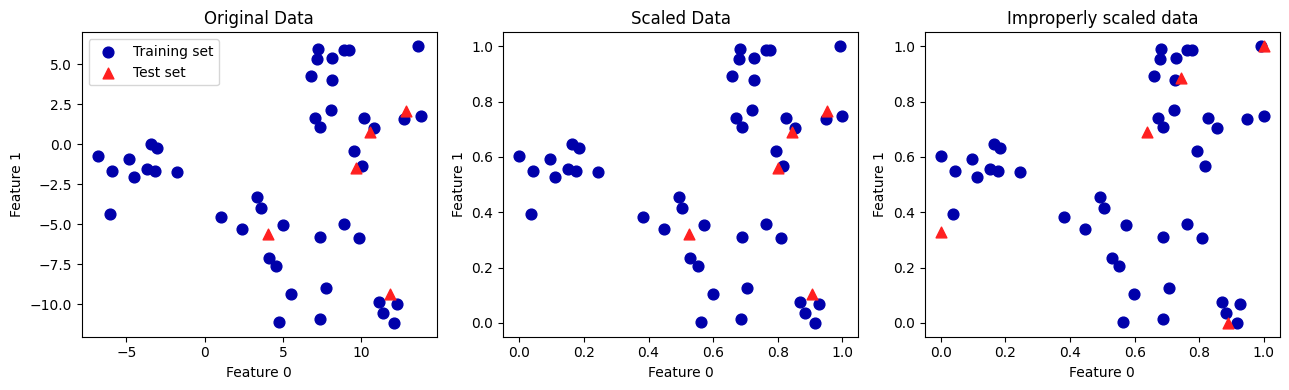

In [14]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Making synthetic data
X, _ = make_blobs(n_samples = 50, centers = 5, random_state = 4, cluster_std = 2)

# Splitting into training & test set
X_train, X_test = train_test_split(X, random_state=5, test_size = 0.1)


# Plotting the training & test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], color = mglearn.cm2(0),
                label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', color = mglearn.cm2(1),
                label="Test set", s=60)
axes[0].legend(loc="upper left")
axes[0].set_title("Original Data")


# Scaling the data using minmaxscaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualizng the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], color=mglearn.cm2(0),
                label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker = '^',
                color = mglearn.cm2(1), label = "Test set", s=60)
axes[1].set_title("Scaled Data")


# Rescaling test set (for illustration only)
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# Visualizing wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], color = mglearn.cm2(0), label="Training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker = '^', color = mglearn.cm2(1), label = "Test set", s=60)
axes[2].set_title("Improperly scaled data")

for ax in axes:
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")
fig.tight_layout()

This shows that if we scale training and test set separately, it doesn't match the original data after scaling. So, both training and test set should be transformed using the training set fitted MinMaxScaler() only.

## Effect of Preprocessing on Supervised learning

In [15]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


In [16]:
# Scaling data using MinMaxScaler and fitting svc
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
svm.fit(X_train_scaled, y_train)

SVC(C=100)

In [18]:
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


The test set accuracy increased from 94% to 97% after scaling.

## Preprocessing using Standard Scaling (Mean = 0 and Variance = 1)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1.fit(X_train)
X_train_scaled1 = scaler1.transform(X_train)
X_test_scaled1 = scaler1.transform(X_test)

In [20]:
svm.fit(X_train_scaled1, y_train)

SVC(C=100)

In [21]:
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled1, y_test)))

SVM test accuracy: 0.96
